In [1]:
#Credit Risk Modelling

In [2]:
#Problem Statement: Financial institutions face significant risks when granting loans to borrowers.
#Accurately predicting the likelihood of loan defaults is crucial for minimizing financial losses and maintaining a healthy loan portfolio.
#This project aims to develop a predictive model using logistic regression, random forest, and gradient boosting techniques to estimate the probability of default for individual loan applicants based on their historical data and credit characteristics.
#By leveraging these models, the institution can make informed lending decisions, improve risk management, and enhance overall financial stability.

In [3]:
#Import important libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
df=pd.read_csv("customer_data.csv")
df1=pd.read_csv("payment_data.csv") #importing data

In [5]:
#Lets checkout whats there in our dataset
df.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


In [6]:
df1.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
0,58987402,0,0,0,0,1,10,16500.0,04/12/2016,0.0,NaN,NaN
1,58995151,0,0,0,0,1,5,NaN,04/12/2016,588720.0,491100.0,NaN
2,58997200,0,0,0,0,2,5,NaN,04/12/2016,840000.0,700500.0,22/04/2016
3,54988608,0,0,0,0,3,10,37400.0,03/12/2016,8425.2,7520.0,25/04/2016
4,54987763,0,0,0,0,2,10,NaN,03/12/2016,15147.6,NaN,26/04/2016


In [7]:
#Lets check data types of both dataframes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1125 non-null   int64  
 1   id      1125 non-null   int64  
 2   fea_1   1125 non-null   int64  
 3   fea_2   976 non-null    float64
 4   fea_3   1125 non-null   int64  
 5   fea_4   1125 non-null   float64
 6   fea_5   1125 non-null   int64  
 7   fea_6   1125 non-null   int64  
 8   fea_7   1125 non-null   int64  
 9   fea_8   1125 non-null   int64  
 10  fea_9   1125 non-null   int64  
 11  fea_10  1125 non-null   int64  
 12  fea_11  1125 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 114.4 KB


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250 entries, 0 to 8249
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               8250 non-null   int64  
 1   OVD_t1           8250 non-null   int64  
 2   OVD_t2           8250 non-null   int64  
 3   OVD_t3           8250 non-null   int64  
 4   OVD_sum          8250 non-null   int64  
 5   pay_normal       8250 non-null   int64  
 6   prod_code        8250 non-null   int64  
 7   prod_limit       2132 non-null   float64
 8   update_date      8224 non-null   object 
 9   new_balance      8250 non-null   float64
 10  highest_balance  7841 non-null   float64
 11  report_date      7136 non-null   object 
dtypes: float64(3), int64(7), object(2)
memory usage: 773.6+ KB


In [9]:
#Lets check for missing values in df
df.isnull().sum()

label       0
id          0
fea_1       0
fea_2     149
fea_3       0
fea_4       0
fea_5       0
fea_6       0
fea_7       0
fea_8       0
fea_9       0
fea_10      0
fea_11      0
dtype: int64

In [10]:
#Lets check for missing values in df1
df1.isnull().sum()

id                    0
OVD_t1                0
OVD_t2                0
OVD_t3                0
OVD_sum               0
pay_normal            0
prod_code             0
prod_limit         6118
update_date          26
new_balance           0
highest_balance     409
report_date        1114
dtype: int64

columns: label


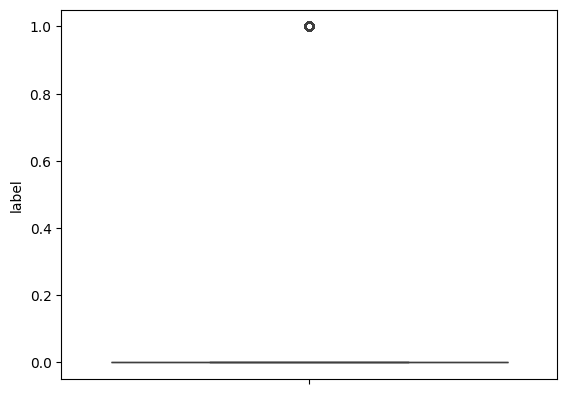

columns: id


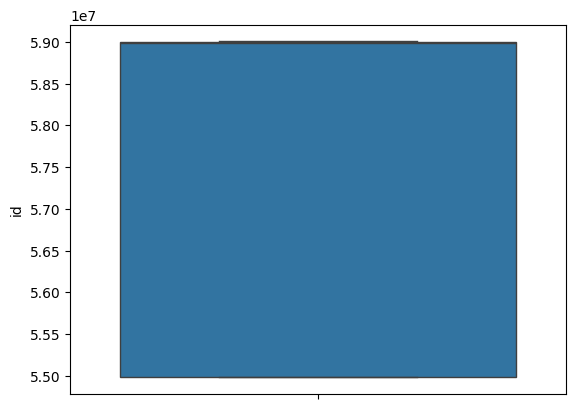

columns: fea_1


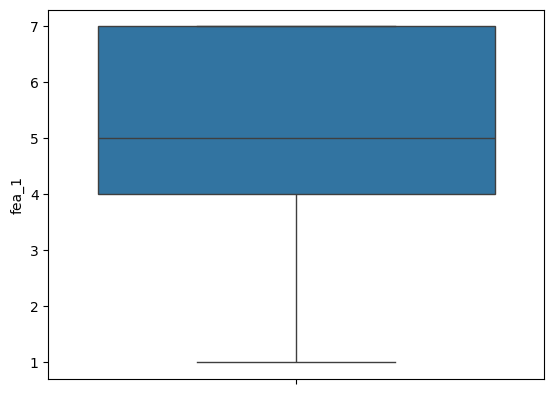

columns: fea_2


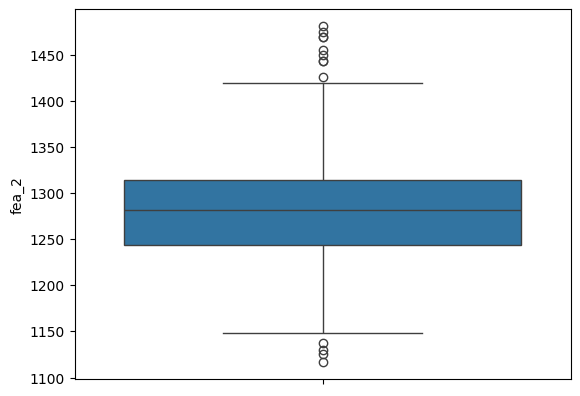

columns: fea_3


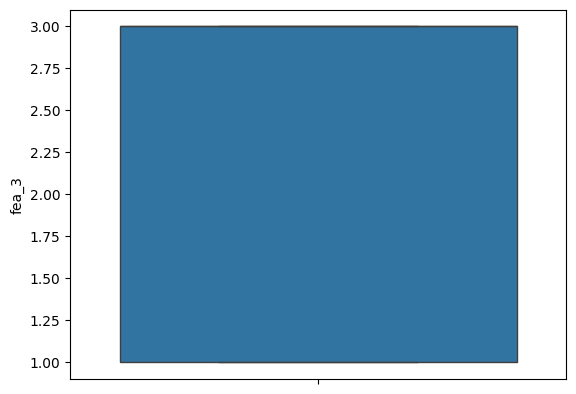

columns: fea_4


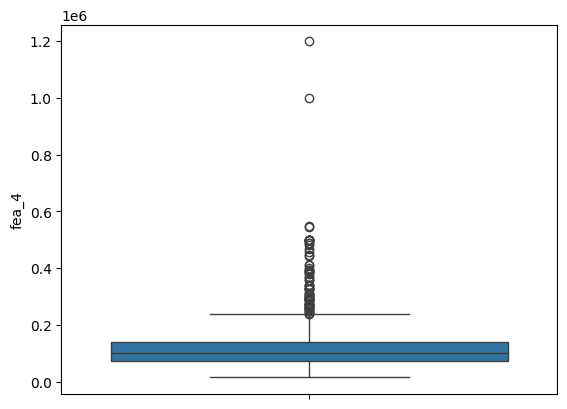

columns: fea_5


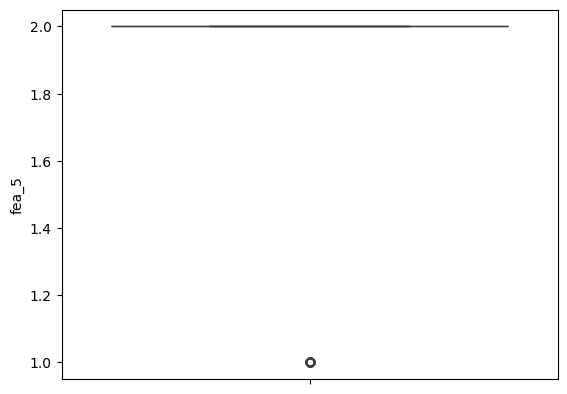

columns: fea_6


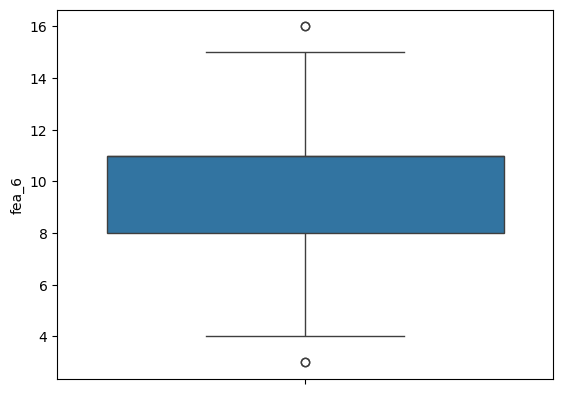

columns: fea_7


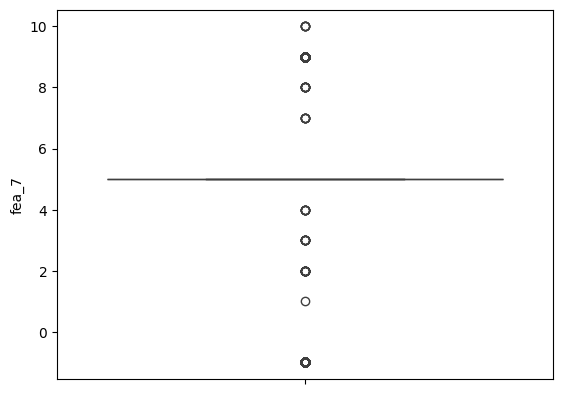

columns: fea_8


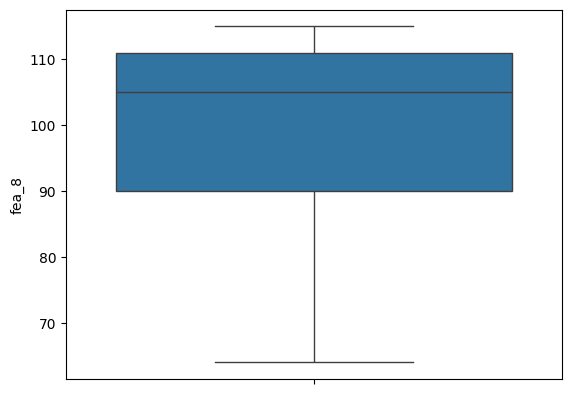

columns: fea_9


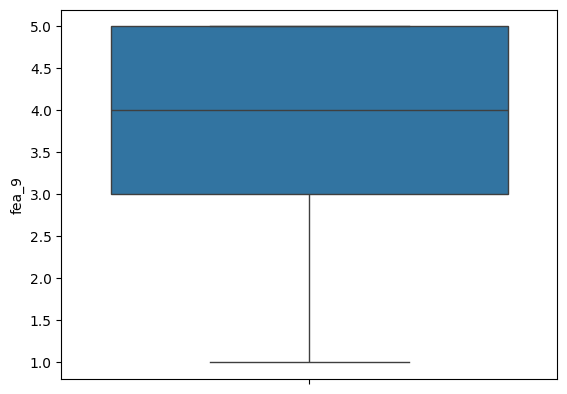

columns: fea_10


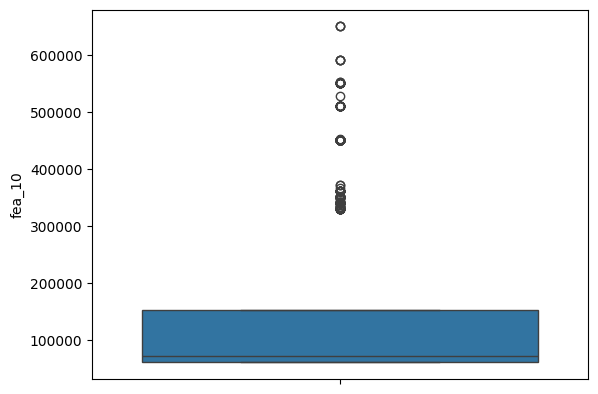

columns: fea_11


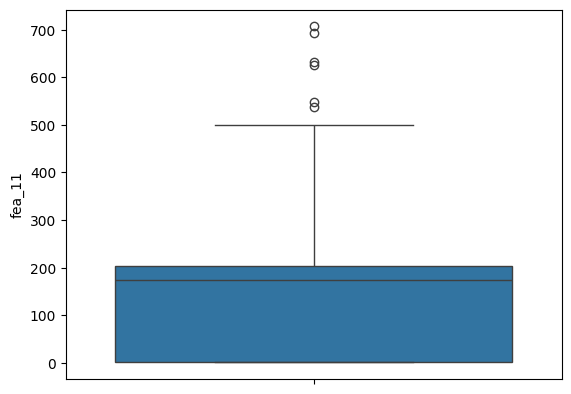

In [11]:
##Lets plot some boxplots for outliers
for i in df.columns:
    print('columns:',i)
    sns.boxplot(df[i])
    plt.show()

In [12]:
#We can see there are many outliers

In [13]:
#There is missing values in feat 2 in df. The same can be impute by KNN Imputer
from sklearn.impute import KNNImputer
impute = KNNImputer(n_neighbors= 3)
df['fea_2'] = impute.fit_transform(df[['fea_2']])

In [14]:
#lets check if this worked
df.isnull().sum()

label     0
id        0
fea_1     0
fea_2     0
fea_3     0
fea_4     0
fea_5     0
fea_6     0
fea_7     0
fea_8     0
fea_9     0
fea_10    0
fea_11    0
dtype: int64

In [15]:
#for df1
df1.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
0,58987402,0,0,0,0,1,10,16500.0,04/12/2016,0.0,NaN,NaN
1,58995151,0,0,0,0,1,5,NaN,04/12/2016,588720.0,491100.0,NaN
2,58997200,0,0,0,0,2,5,NaN,04/12/2016,840000.0,700500.0,22/04/2016
3,54988608,0,0,0,0,3,10,37400.0,03/12/2016,8425.2,7520.0,25/04/2016
4,54987763,0,0,0,0,2,10,NaN,03/12/2016,15147.6,NaN,26/04/2016


In [16]:
#Updating datatype of dates columns
df1['update_date'] = pd.to_datetime(df1['update_date'], format='%d/%m/%Y')
print(df1['update_date'].dtype)

datetime64[ns]


In [17]:
df1['update_date'] = pd.to_datetime(df1['report_date'], format='%d/%m/%Y')
print(df1['report_date'].dtype)

object


In [18]:
##Lets break date into day, month and year
df1['report_date'] = pd.to_datetime(df1['report_date'], errors='coerce')
print(df1['report_date'].dtype)
df1['year1'] = df1['report_date'].dt.year
df1['month2'] = df1['report_date'].dt.month
df1['day3'] = df1['report_date'].dt.day

print(df1[['report_date', 'year1', 'month2', 'day3']].head())


datetime64[ns]
  report_date   year1  month2  day3
0         NaT     NaN     NaN   NaN
1         NaT     NaN     NaN   NaN
2  2016-04-22  2016.0     4.0  22.0
3  2016-04-25  2016.0     4.0  25.0
4  2016-04-26  2016.0     4.0  26.0


<ipython-input-18-350498d5c0b0>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1['report_date'] = pd.to_datetime(df1['report_date'], errors='coerce')


In [19]:
df1['report_year1'] = df1['update_date'].dt.year
df1['report_month'] = df1['update_date'].dt.month
df1['report_day'] = df1['update_date'].dt.day

In [20]:
##Imputing values for new features
from sklearn.impute import KNNImputer
impute = KNNImputer(n_neighbors= 3)
cols = ['year1','month2','day3']
df1[cols] = df1[cols].round()
for i in cols:
    df1[i] = impute.fit_transform(df1[[i]])

In [21]:
from sklearn.impute import KNNImputer
impute = KNNImputer(n_neighbors= 3)
cols = ['report_year1','report_month','report_day']
df1[cols] = df1[cols].round()
for i in cols:
    df1[i] = impute.fit_transform(df1[[i]])

In [22]:
df1.head()

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date,year1,month2,day3,report_year1,report_month,report_day
0,58987402,0,0,0,0,1,10,16500.0,NaT,0.0,NaN,NaT,2013.985706,6.36505,17.69829,2013.985706,6.36505,17.69829
1,58995151,0,0,0,0,1,5,NaN,NaT,588720.0,491100.0,NaT,2013.985706,6.36505,17.69829,2013.985706,6.36505,17.69829
2,58997200,0,0,0,0,2,5,NaN,2016-04-22,840000.0,700500.0,2016-04-22,2016.000000,4.00000,22.00000,2016.000000,4.00000,22.00000
3,54988608,0,0,0,0,3,10,37400.0,2016-04-25,8425.2,7520.0,2016-04-25,2016.000000,4.00000,25.00000,2016.000000,4.00000,25.00000
4,54987763,0,0,0,0,2,10,NaN,2016-04-26,15147.6,NaN,2016-04-26,2016.000000,4.00000,26.00000,2016.000000,4.00000,26.00000


In [23]:
#Checking for null values in df1
df1.isnull().sum()

id                    0
OVD_t1                0
OVD_t2                0
OVD_t3                0
OVD_sum               0
pay_normal            0
prod_code             0
prod_limit         6118
update_date        1114
new_balance           0
highest_balance     409
report_date        1114
year1                 0
month2                0
day3                  0
report_year1          0
report_month          0
report_day            0
dtype: int64

In [24]:
##Lets understand datatypes
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250 entries, 0 to 8249
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               8250 non-null   int64         
 1   OVD_t1           8250 non-null   int64         
 2   OVD_t2           8250 non-null   int64         
 3   OVD_t3           8250 non-null   int64         
 4   OVD_sum          8250 non-null   int64         
 5   pay_normal       8250 non-null   int64         
 6   prod_code        8250 non-null   int64         
 7   prod_limit       2132 non-null   float64       
 8   update_date      7136 non-null   datetime64[ns]
 9   new_balance      8250 non-null   float64       
 10  highest_balance  7841 non-null   float64       
 11  report_date      7136 non-null   datetime64[ns]
 12  year1            8250 non-null   float64       
 13  month2           8250 non-null   float64       
 14  day3             8250 non-null   float64

In [25]:
cols = ['report_year1','report_month','report_day','year1','month2','day3']

for i in cols:
    df1[i] = df1[i].astype(int)

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250 entries, 0 to 8249
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               8250 non-null   int64         
 1   OVD_t1           8250 non-null   int64         
 2   OVD_t2           8250 non-null   int64         
 3   OVD_t3           8250 non-null   int64         
 4   OVD_sum          8250 non-null   int64         
 5   pay_normal       8250 non-null   int64         
 6   prod_code        8250 non-null   int64         
 7   prod_limit       2132 non-null   float64       
 8   update_date      7136 non-null   datetime64[ns]
 9   new_balance      8250 non-null   float64       
 10  highest_balance  7841 non-null   float64       
 11  report_date      7136 non-null   datetime64[ns]
 12  year1            8250 non-null   int64         
 13  month2           8250 non-null   int64         
 14  day3             8250 non-null   int64  

In [27]:
#Datatype updated

In [28]:
#Merging df and df1 together
merged_df = df.merge(df1, on='id')


In [29]:
##Drop update date and report date columns
merged_df.drop(columns=['update_date','report_date'],inplace=True)

In [30]:
##Lets check for null values in new dataframe
merged_df.isnull().sum()

label                 0
id                    0
fea_1                 0
fea_2                 0
fea_3                 0
fea_4                 0
fea_5                 0
fea_6                 0
fea_7                 0
fea_8                 0
fea_9                 0
fea_10                0
fea_11                0
OVD_t1                0
OVD_t2                0
OVD_t3                0
OVD_sum               0
pay_normal            0
prod_code             0
prod_limit         6118
new_balance           0
highest_balance     409
year1                 0
month2                0
day3                  0
report_year1          0
report_month          0
report_day            0
dtype: int64

In [31]:
#Imputing missing values for above two features
from sklearn.impute import KNNImputer
impute = KNNImputer(n_neighbors= 3)
cols = ['prod_limit','highest_balance','fea_2']
merged_df[cols] = merged_df[cols].round()
for i in cols:
    merged_df[i] = impute.fit_transform(merged_df[[i]])

In [32]:
#Spliting the model for training and testing
X= merged_df.drop(columns= ["label"], axis=1)
y= merged_df["label"]

In [33]:
##Preparing for training 80% for training and 20% for testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=42)

In [34]:
##Model Training
#Lets start with Logistic Regression
from sklearn.linear_model  import LogisticRegression

In [35]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [36]:
##Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [37]:
model1 = RandomForestClassifier()
model1.fit(X_train, y_train)

RandomForestClassifier()

In [38]:
y_pred = model.predict(X_test)
predictions = model1.predict(X_test)

In [39]:
##Lets check accuracy
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test,y_pred)
accuracy1 = accuracy_score(y_test,predictions)
print('logisticRegression:' )
print("Accuracy:", accuracy)
print()
print('RandomForestClassifier:' )
print("Accuracy:", accuracy1)

logisticRegression:
Accuracy: 0.8387878787878787

RandomForestClassifier:
Accuracy: 0.9551515151515152


In [40]:
#Excellent
#Lets check the accuracy with X_test that we have
new_data_predictions_logistic = model.predict(X_test)

for i in range(15):
    predicted_label = new_data_predictions_logistic[i]
    actual_label = y_test.iloc[i]

    print("Instance", i+1)
    print("Predicted Label:", predicted_label)
    print("Actual Label:", actual_label)
    print("✅" if predicted_label == actual_label else "❌")
    print()

Instance 1
Predicted Label: 0
Actual Label: 0
✅

Instance 2
Predicted Label: 0
Actual Label: 0
✅

Instance 3
Predicted Label: 0
Actual Label: 0
✅

Instance 4
Predicted Label: 0
Actual Label: 0
✅

Instance 5
Predicted Label: 0
Actual Label: 0
✅

Instance 6
Predicted Label: 0
Actual Label: 0
✅

Instance 7
Predicted Label: 0
Actual Label: 0
✅

Instance 8
Predicted Label: 0
Actual Label: 0
✅

Instance 9
Predicted Label: 0
Actual Label: 0
✅

Instance 10
Predicted Label: 0
Actual Label: 0
✅

Instance 11
Predicted Label: 0
Actual Label: 0
✅

Instance 12
Predicted Label: 0
Actual Label: 1
❌

Instance 13
Predicted Label: 0
Actual Label: 0
✅

Instance 14
Predicted Label: 0
Actual Label: 0
✅

Instance 15
Predicted Label: 0
Actual Label: 0
✅



In [41]:
#For Random Forest Classifier Model, lets check the accuracy with X_test
new_data_predictions_regeression = model1.predict(X_test)

for i in range(15):
    predicted_label = new_data_predictions_regeression[i]
    actual_label = y_test.iloc[i]

    print("Instance", i+1)
    print("Predicted Label:", predicted_label)
    print("Actual Label:", actual_label)
    print("✅" if predicted_label == actual_label else "❌")
    print()

Instance 1
Predicted Label: 0
Actual Label: 0
✅

Instance 2
Predicted Label: 0
Actual Label: 0
✅

Instance 3
Predicted Label: 0
Actual Label: 0
✅

Instance 4
Predicted Label: 0
Actual Label: 0
✅

Instance 5
Predicted Label: 0
Actual Label: 0
✅

Instance 6
Predicted Label: 0
Actual Label: 0
✅

Instance 7
Predicted Label: 0
Actual Label: 0
✅

Instance 8
Predicted Label: 0
Actual Label: 0
✅

Instance 9
Predicted Label: 0
Actual Label: 0
✅

Instance 10
Predicted Label: 0
Actual Label: 0
✅

Instance 11
Predicted Label: 0
Actual Label: 0
✅

Instance 12
Predicted Label: 1
Actual Label: 1
✅

Instance 13
Predicted Label: 0
Actual Label: 0
✅

Instance 14
Predicted Label: 0
Actual Label: 0
✅

Instance 15
Predicted Label: 0
Actual Label: 0
✅



In [42]:
##Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [43]:
##Prediction
y_pred = gbc.predict(X_test)

In [44]:
##Lets check accuracy
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test,y_pred)
print('GradientBoostingClassifier:' )
print("Accuracy:", accuracy)

GradientBoostingClassifier:
Accuracy: 0.8806060606060606


In [45]:
#For Gradient Boosting Classifier Model, lets check the accuracy with X_test
new_data_predictions_regeression_1 = gbc.predict(X_test)

for i in range(15):
    predicted_label = new_data_predictions_regeression_1[i]
    actual_label = y_test.iloc[i]

    print("Instance", i+1)
    print("Predicted Label:", predicted_label)
    print("Actual Label:", actual_label)
    print("✅" if predicted_label == actual_label else "❌")
    print()

Instance 1
Predicted Label: 0
Actual Label: 0
✅

Instance 2
Predicted Label: 0
Actual Label: 0
✅

Instance 3
Predicted Label: 0
Actual Label: 0
✅

Instance 4
Predicted Label: 0
Actual Label: 0
✅

Instance 5
Predicted Label: 0
Actual Label: 0
✅

Instance 6
Predicted Label: 0
Actual Label: 0
✅

Instance 7
Predicted Label: 0
Actual Label: 0
✅

Instance 8
Predicted Label: 0
Actual Label: 0
✅

Instance 9
Predicted Label: 0
Actual Label: 0
✅

Instance 10
Predicted Label: 0
Actual Label: 0
✅

Instance 11
Predicted Label: 0
Actual Label: 0
✅

Instance 12
Predicted Label: 1
Actual Label: 1
✅

Instance 13
Predicted Label: 0
Actual Label: 0
✅

Instance 14
Predicted Label: 0
Actual Label: 0
✅

Instance 15
Predicted Label: 0
Actual Label: 0
✅

